# LIBRARIES

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix, auc
from sklearn.ensemble import RandomForestClassifier
from tensorflow import keras
from tensorflow.keras import layers
import seaborn as sns
from sklearn.svm import SVC

# READ DATA

In [3]:
data = pd.read_csv('Heart Disease.csv') 

data.fillna(data.mean(), inplace=True)
X = data.drop(columns=['group', 'ID', 'outcome (Target)'])
y = data['outcome (Target)']

X_train_temp, X_test_temp, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
data.head()

,group,ID,outcome (Target),age,gender,BMI,hypertensive,atrialfibrillation,CHD with no MI,diabetes,...,Blood sodium,Blood calcium,Chloride,Anion gap,Magnesium ion,PH,Bicarbonate,Lactic acid,PCO2,EF
0,1,125047,0.0,72,1,37.588179,0,0,0,1,...,138.750000,7.463636,109.166667,13.166667,2.618182,7.230,21.166667,0.5,40.0,55
1,1,139812,0.0,75,2,30.188278,0,0,0,0,...,138.888889,8.162500,98.444444,11.444444,1.887500,7.225,33.444444,0.5,78.0,55
2,1,109787,0.0,83,2,26.572634,0,0,0,0,...,140.714286,8.266667,105.857143,10.000000,2.157143,7.268,30.571429,0.5,71.5,35
3,1,130587,0.0,43,2,83.264629,0,0,0,0,...,138.500000,9.476923,92.071429,12.357143,1.942857,7.370,38.571429,0.6,75.0,55
4,1,138290,0.0,75,2,31.824842,1,0,0,0,...,136.666667,8.733333,104.500000,15.166667,1.650000,7.250,22.000000,0.6,50.0,55


In [5]:
print(np.unique(y_train))
print(np.unique(y_test))

[0.         0.13520408 1.        ]
[0. 1.]


# BINARIZE DATA

In [6]:
y_train = (y_train >= 0.5).astype(int)
y_test = (y_test >= 0.5).astype(int)

In [7]:
print(np.unique(y_train))
print(np.unique(y_test))

[0 1]
[0 1]


# SCALING DATA

In [8]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train_temp)
X_test = scaler.transform(X_test_temp)

# PLOTTING FUNCTIONS

In [36]:
def plot_accuracy(model_name, accuracy):
    plt.figure(figsize=(6, 4))
    sns.barplot(x=[model_name], y=[accuracy * 100])
    plt.title(f'{model_name} Accuracy')
    plt.ylabel('Accuracy (%)')
    plt.ylim(0, 100)
    plt.show()

def plot_confusion_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f'Confusion Matrix: {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# LOGISTIC REGRESSION

In [29]:
logreg = LogisticRegression(max_iter=5000)
logreg.fit(X_train, y_train)

y_pred_logreg = logreg.predict(X_test)

accuracy = accuracy_score(y_test, y_pred_logreg)
print(f"Logistic Regression Accuracy: {accuracy * 100:.2f}%")

report_logreg = classification_report(y_test, y_pred_logreg)
print("\nClassification Report:")
print(report_logreg)

Logistic Regression Accuracy: 86.44%

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.98      0.92       198
           1       0.71      0.26      0.38        38

    accuracy                           0.86       236
   macro avg       0.79      0.62      0.65       236
weighted avg       0.85      0.86      0.84       236



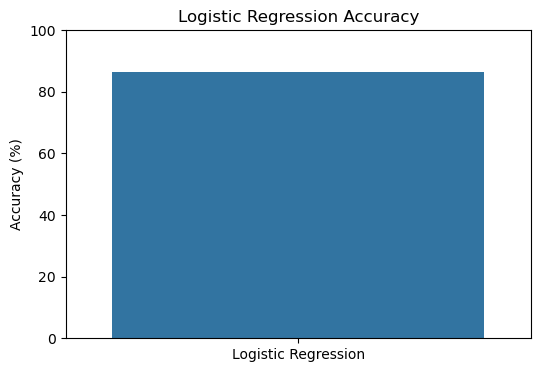

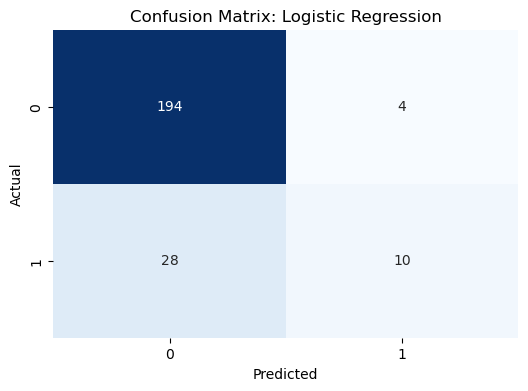

In [30]:
plot_accuracy("Logistic Regression", accuracy)
plot_confusion_matrix(y_test, y_pred_logreg, "Logistic Regression")

# NAIIVE BAYES CLASSIFIER

In [31]:
nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)

y_pred_nb = nb_classifier.predict(X_test)

accuracy_nb = accuracy_score(y_test, y_pred_nb)

print(f"Naive Bayes Classifier Accuracy: {accuracy_nb * 100:.2f}%")

report_nb = classification_report(y_test, y_pred_nb)
print("\nClassification Report:")
print(report_nb)

Naive Bayes Classifier Accuracy: 81.78%

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.90      0.89       198
           1       0.43      0.39      0.41        38

    accuracy                           0.82       236
   macro avg       0.66      0.65      0.65       236
weighted avg       0.81      0.82      0.81       236



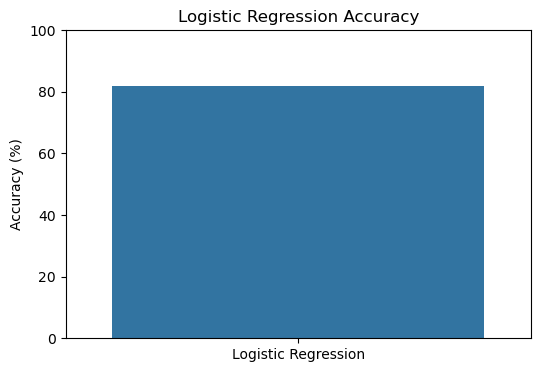

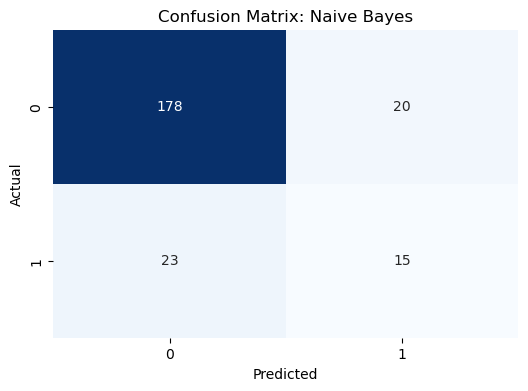

In [32]:
plot_accuracy("Logistic Regression", accuracy_nb)
plot_confusion_matrix(y_test, y_pred_nb, "Naive Bayes")

# DECISION TREE CLASSIFIER

In [33]:
clf = DecisionTreeClassifier(criterion='entropy')
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

accuracy_dt = accuracy_score(y_test, y_pred)
print(f"Decision Tree Accuracy: {accuracy_dt * 100:.2f}%")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Decision Tree Accuracy: 78.81%

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.91      0.88       198
           1       0.25      0.16      0.19        38

    accuracy                           0.79       236
   macro avg       0.55      0.53      0.54       236
weighted avg       0.75      0.79      0.77       236

Confusion Matrix:
[[180  18]
 [ 32   6]]


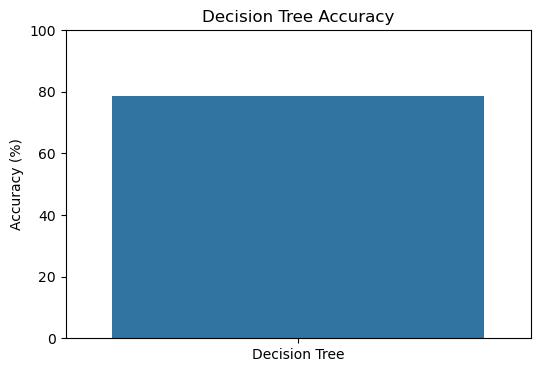

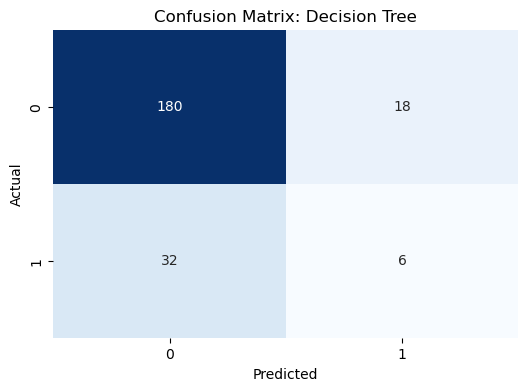

In [34]:
plot_accuracy("Decision Tree", accuracy_dt)
plot_confusion_matrix(y_test, y_pred, "Decision Tree")

# RANDOM FOREST

In [78]:
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)

y_pred = rf_clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Random Forest Accuracy: {accuracy * 100:.2f}%")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Random Forest Accuracy: 86.02%

Classification Report:
              precision    recall  f1-score   support

           0       0.86      1.00      0.92       198
           1       1.00      0.13      0.23        38

    accuracy                           0.86       236
   macro avg       0.93      0.57      0.58       236
weighted avg       0.88      0.86      0.81       236

Confusion Matrix:
[[198   0]
 [ 33   5]]


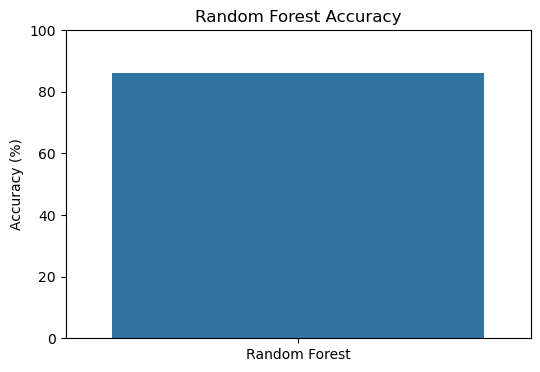

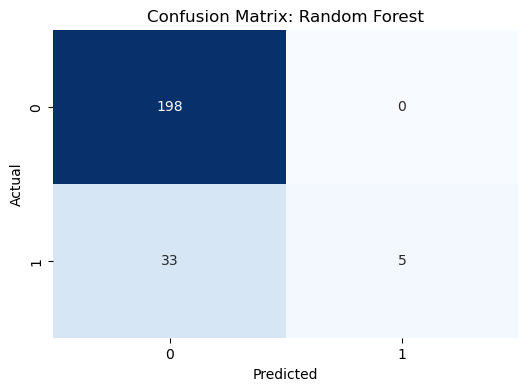

In [79]:
plot_accuracy("Random Forest", accuracy)
plot_confusion_matrix(y_test, y_pred, "Random Forest")

# ARTIFICIAL NEURAL NETWORK

In [80]:
ann_model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dense(32, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

ann_model.compile(loss='binary_crossentropy', metrics=['accuracy'])
ann_model.fit(X_train, y_train, epochs=10, batch_size=10, validation_split=0.1)

y_pred_probs = ann_model.predict(X_test)  
y_pred = (y_pred_probs > 0.5).astype(int)

loss, accuracy = ann_model.evaluate(X_test, y_test)
print(f"ANN Accuracy: {accuracy * 100:.2f}%")

report_ann = classification_report(y_test, y_pred)
print("\nClassification Report:")
print(report_ann)

D:\Anaconda\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
85/85 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8117 - loss: 0.4584 - val_accuracy: 0.8000 - val_loss: 0.5237
Epoch 2/10
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8884 - loss: 0.3123 - val_accuracy: 0.8105 - val_loss: 0.5515
Epoch 3/10
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9129 - loss: 0.2548 - val_accuracy: 0.7684 - val_loss: 0.5768
Epoch 4/10
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9125 - loss: 0.2254 - val_accuracy: 0.8105 - val_loss: 0.6342
Epoch 5/10
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9345 - loss: 0.1898 - val_accuracy: 0.7895 - val_loss: 0.6586
Epoch 6/10
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9409 - loss: 0.1640 - val_accuracy: 0.7895 - val_loss: 0.6918
Epoch 7/10
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9369 - loss: 0.2102 - val_accuracy: 0.8000 - val_loss: 0.7477
Epoch 8/10
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9450 - loss: 0.1591 - val_accuracy: 0.8000 - val_loss:

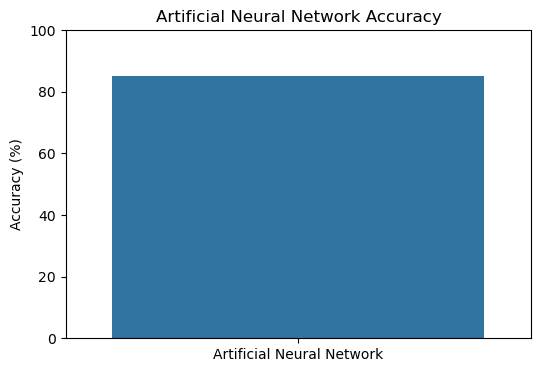

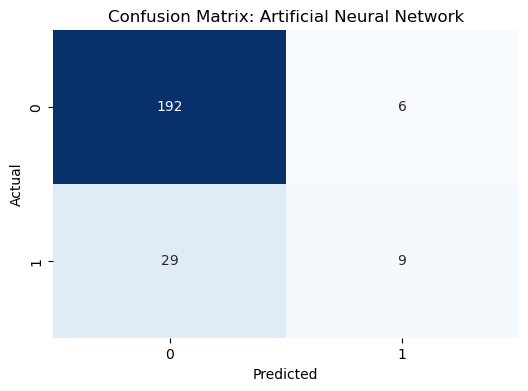

In [81]:
plot_accuracy("Artificial Neural Network", accuracy)
plot_confusion_matrix(y_test, y_pred, "Artificial Neural Network")

# SUPPORT VECTOR MACHINE

In [20]:
svm_model = SVC(kernel='sigmoid') 
svm_model.fit(X_train, y_train)

y_pred_svm = svm_model.predict(X_test)

accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f"SVM Accuracy: {accuracy_svm * 100:.2f}%")

report_svm = classification_report(y_test, y_pred_svm)
print("\nClassification Report for SVM:")
print(report_svm)

SVM Accuracy: 86.44%

Classification Report for SVM:
              precision    recall  f1-score   support

           0       0.86      1.00      0.93       198
           1       1.00      0.16      0.27        38

    accuracy                           0.86       236
   macro avg       0.93      0.58      0.60       236
weighted avg       0.88      0.86      0.82       236



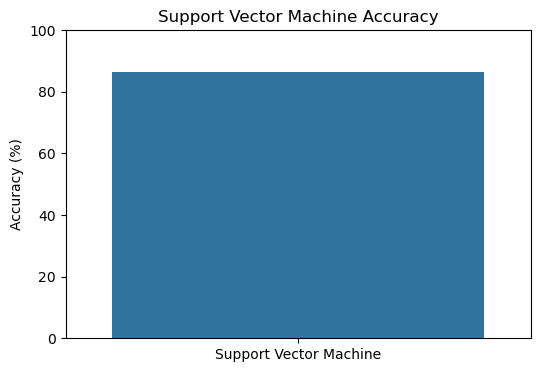

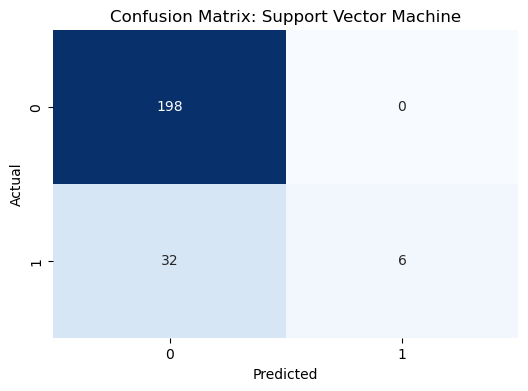

In [35]:
plot_accuracy("Support Vector Machine", accuracy_svm)
plot_confusion_matrix(y_test, y_pred_svm, "Support Vector Machine")